<a href="https://colab.research.google.com/github/ShiaiSkywalker/mid-term-assignment/blob/main/midterm_assignment_grp_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#warning filter and importing libraries

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [2]:
train = pd.read_csv("https://raw.githubusercontent.com/ShiaiSkywalker/mid-term-assignment/main/train.csv")

test = pd.read_csv("https://raw.githubusercontent.com/ShiaiSkywalker/mid-term-assignment/main/test.csv")

In [3]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
train.shape

(550068, 12)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [6]:
train.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [7]:
train.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [8]:
train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [9]:
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [10]:
test.shape

(233599, 11)

In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     233599 non-null  int64  
 1   Product_ID                  233599 non-null  object 
 2   Gender                      233599 non-null  object 
 3   Age                         233599 non-null  object 
 4   Occupation                  233599 non-null  int64  
 5   City_Category               233599 non-null  object 
 6   Stay_In_Current_City_Years  233599 non-null  object 
 7   Marital_Status              233599 non-null  int64  
 8   Product_Category_1          233599 non-null  int64  
 9   Product_Category_2          161255 non-null  float64
 10  Product_Category_3          71037 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 19.6+ MB


In [12]:
test.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

EXPLORATORY ANALYSIS

In [13]:
train['Age'].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

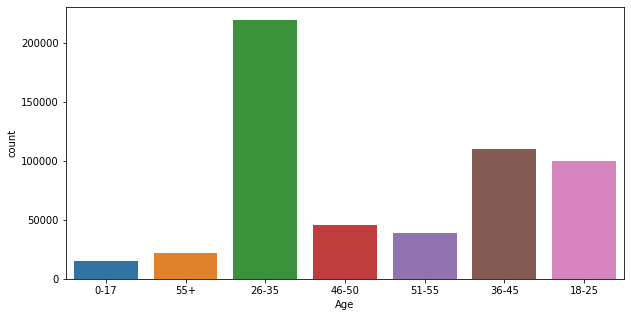

In [14]:
plt.figure(figsize=(10,5))
sns.countplot(train['Age'])

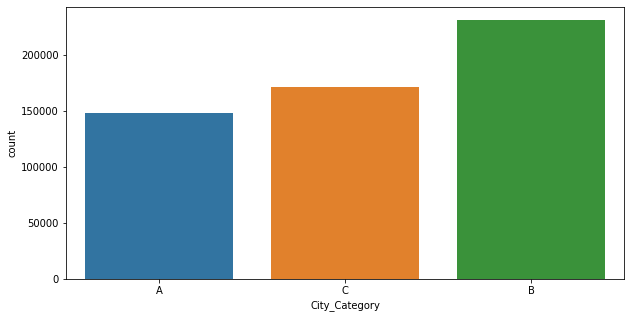

In [15]:
plt.figure(figsize=(10,5))
sns.countplot(train['City_Category'])

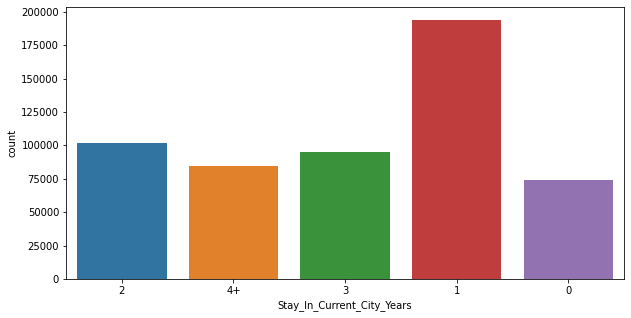

In [16]:
plt.figure(figsize=(10,5))
sns.countplot(train['Stay_In_Current_City_Years'])

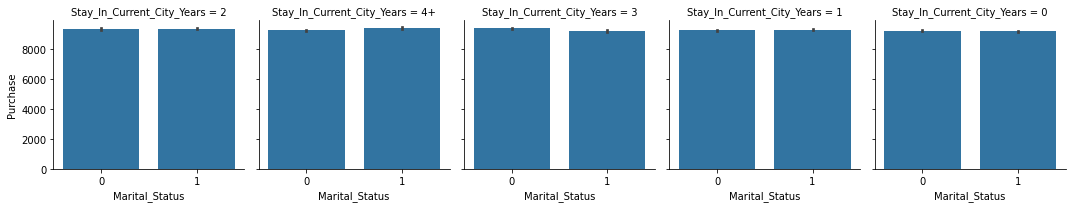

In [17]:
g = sns.FacetGrid(train,col="Stay_In_Current_City_Years")
g.map(sns.barplot, "Marital_Status", "Purchase");

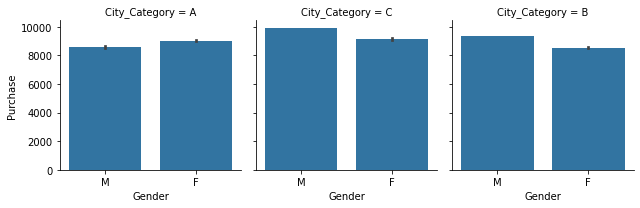

In [18]:
g = sns.FacetGrid(train,col="City_Category")
g.map(sns.barplot, "Gender", "Purchase");

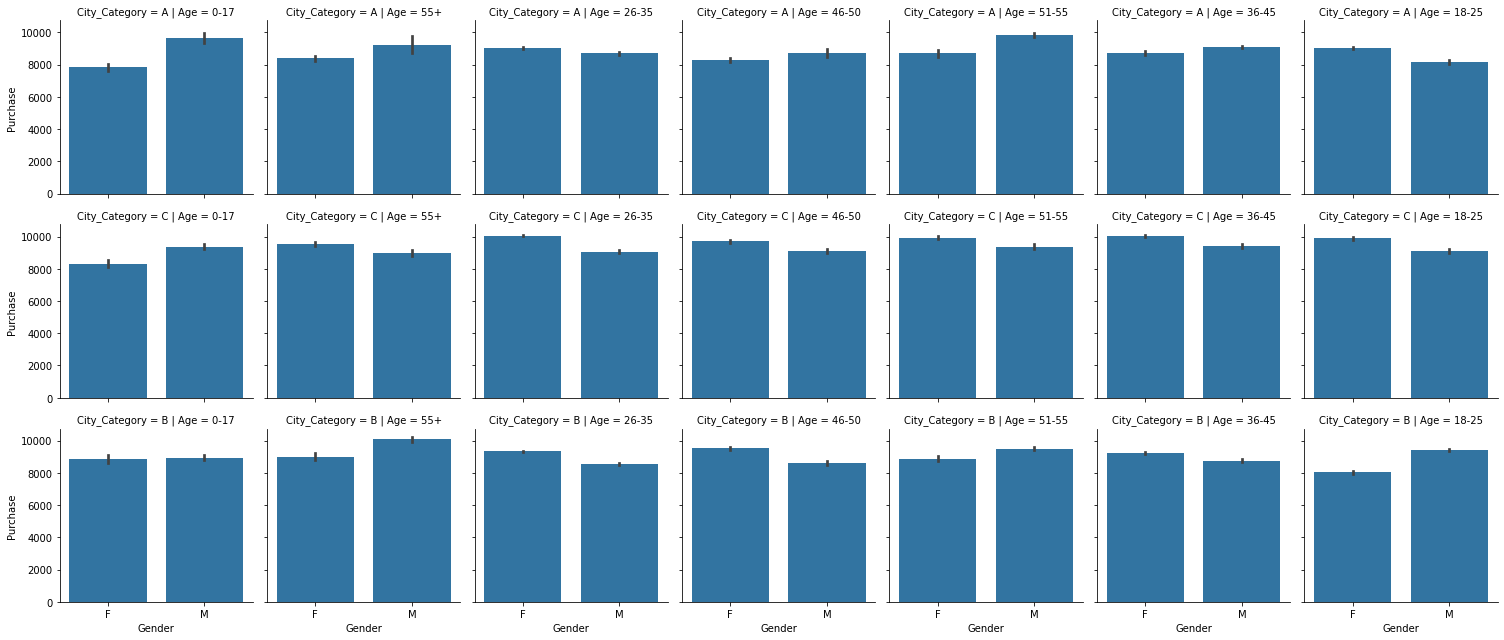

In [19]:
g = sns.FacetGrid(train,col="Age",row="City_Category")
g.map(sns.barplot, "Gender", "Purchase");

In [20]:
train['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6])

In [21]:
train['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [22]:
train['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [23]:
print(train['Product_Category_1'].unique())
print(train['Product_Category_2'].unique())
print(train['Product_Category_3'].unique())

[ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9 20 19]
[nan  6. 14.  2.  8. 15. 16. 11.  5.  3.  4. 12.  9. 10. 17. 13.  7. 18.]
[nan 14. 17.  5.  4. 16. 15.  8.  9. 13.  6. 12.  3. 18. 11. 10.]


PRE-PROCESSING

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
train['User_ID'] = train['User_ID'] - 1000000
test['User_ID'] = test['User_ID'] - 1000000

enc = LabelEncoder()
train['User_ID'] = enc.fit_transform(train['User_ID'])
test['User_ID'] = enc.transform(test['User_ID'])

In [25]:
train['Product_ID'] = train['Product_ID'].str.replace('P00', '')
test['Product_ID'] = test['Product_ID'].str.replace('P00', '')

scaler = StandardScaler()
train['Product_ID'] = scaler.fit_transform(train['Product_ID'].values.reshape(-1, 1))
test['Product_ID'] = scaler.transform(test['Product_ID'].values.reshape(-1, 1))

In [26]:
categorical_col = ['Gender', 'City_Category']
numerical_col = ['Age', 'Occupation', 'Stay_In_Current_City_Years', 'Product_Category_1', 
           'Product_Category_2', 'Product_Category_3']

In [27]:
train['Age']=train['Age'].replace('0-17',17)
train['Age']=train['Age'].replace('18-25',25)
train['Age']=train['Age'].replace('26-35',35)
train['Age']=train['Age'].replace('36-45',45)
train['Age']=train['Age'].replace('46-50',50)
train['Age']=train['Age'].replace('51-55',55)
train['Age']=train['Age'].replace('55+',60)

In [28]:
test['Age']=test['Age'].replace('0-17',17)
test['Age']=test['Age'].replace('18-25',25)
test['Age']=test['Age'].replace('26-35',35)
test['Age']=test['Age'].replace('36-45',45)
test['Age']=test['Age'].replace('46-50',50)
test['Age']=test['Age'].replace('51-55',55)
test['Age']=test['Age'].replace('55+',60)

In [29]:
train['Stay_In_Current_City_Years']=train['Stay_In_Current_City_Years'].replace('4+',4)
test['Stay_In_Current_City_Years']=test['Stay_In_Current_City_Years'].replace('4+',4)

In [30]:
#filling missing values with 0

train = train.fillna(0)
test = test.fillna(0)

ENCODING

In [31]:
#categorical columns

encoder = LabelEncoder()

for col in categorical_col:
    train[col] = encoder.fit_transform(train[col])
    test[col] = encoder.transform(test[col])

In [32]:
#scaling numerical columns

scaler = StandardScaler()

for col in numerical_col:
    train[col] = scaler.fit_transform(train[col].values.reshape(-1, 1))
    test[col] = scaler.transform(test[col].values.reshape(-1, 1))

In [33]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,-1.028774,0,-2.059570,0.294864,0,0.109801,0,-0.610809,-1.083654,-0.614641,8370
1,0,0.722139,0,-2.059570,0.294864,0,0.109801,0,-1.118912,-0.118323,1.625106,15200
2,0,-0.845799,0,-2.059570,0.294864,0,0.109801,0,1.675656,-1.083654,-0.614641,1422
3,0,-0.869157,0,-2.059570,0.294864,0,0.109801,0,1.675656,1.168785,-0.614641,1057
4,1,1.077382,1,2.094842,1.214734,2,1.660861,0,0.659449,-1.083654,-0.614641,7969


TRAINING MODEL

In [34]:
X = train.drop(['Purchase'], axis=1)
y = train[['Purchase']]
X_test = test
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=42, shuffle=True)

REGRESSION

In [35]:
reg=linear_model.LinearRegression()
lm_model=reg.fit(X_train,y_train)
pred=lm_model.predict(X_val)

In [36]:
np.sqrt(mean_squared_error(y_val,pred))

4609.769799176727

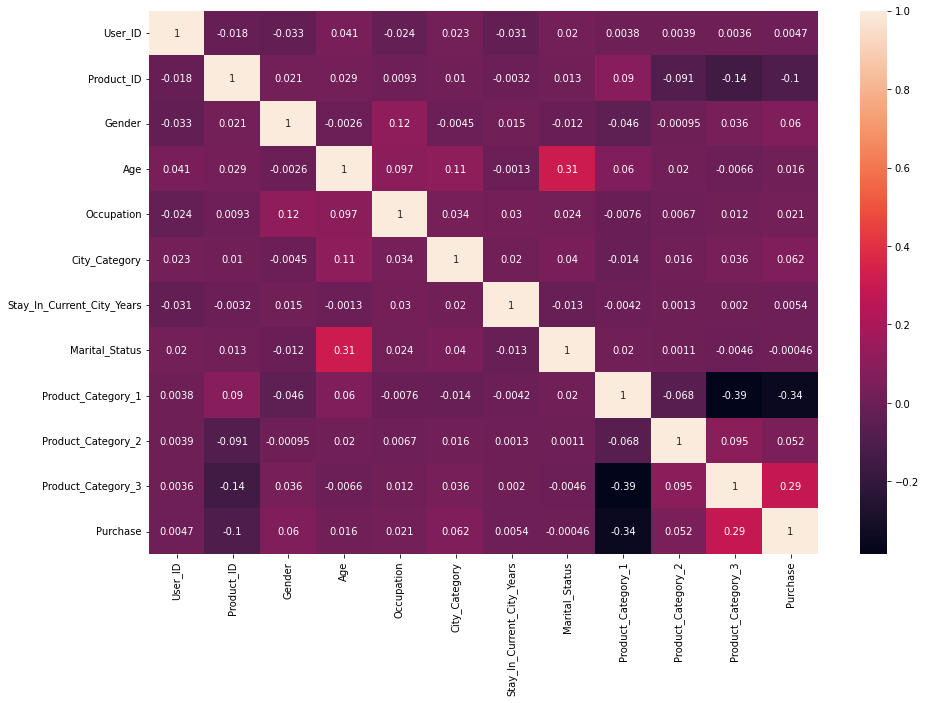

In [37]:
plt.figure(figsize=(15,10))
sns.heatmap(
    train.corr(),
    annot=True
)

TRANSFORMING AND FITTING MODEL

In [38]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X_train = LabelEncoder()
X_train

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
178247,3478,0.575175,1,1.611771,-0.165072,1,0.885331,1,-1.118912,1.329673,-0.614641
196647,336,-0.338725,1,-1.286656,0.601487,2,1.660861,0,-0.102705,-1.083654,-0.614641
418590,4273,1.124099,1,-0.320514,-0.471696,1,-0.665728,0,0.659449,1.168785,2.105051
408727,2852,0.975189,1,-1.286656,-0.625007,1,0.109801,0,0.659449,-1.083654,-0.614641
216416,3340,-1.219535,1,-1.286656,-0.625007,1,-0.665728,0,-1.118912,0.203454,-0.614641
...,...,...,...,...,...,...,...,...,...,...,...
110268,4868,-1.305182,1,1.128700,1.368046,2,0.109801,0,-0.102705,-1.083654,-0.614641
259178,3820,-1.481344,1,-0.320514,0.908111,2,0.109801,1,-0.102705,-1.083654,-0.614641
365838,2190,1.404401,0,-1.286656,-1.084943,1,-0.665728,0,-0.102705,-1.083654,-0.614641
131932,2195,-1.683784,0,-1.286656,-0.625007,1,0.109801,0,0.659449,1.168785,-0.614641


In [39]:
from sklearn.preprocessing import StandardScaler
sc_X_train = StandardScaler()
X_train = sc_X_train.fit_transform(X_train)

sc_X_test = StandardScaler()
X_test = sc_X_test.fit_transform(X_test)

In [40]:
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error

In [41]:
def get_mae(max_leaf_nodes, X_train, X_test, y_train, y_test):
    model = RandomForestRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test,y_pred)
    return(mae)

In [42]:
for max_leaf_nodes in [5, 50, 100, 300, 500, 700, 800, 850]:
    my_mae = get_mae(max_leaf_nodes, X_train, X_val, y_train, y_val)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  2831
Max leaf nodes: 50  		 Mean Absolute Error:  2206
Max leaf nodes: 100  		 Mean Absolute Error:  2175
Max leaf nodes: 300  		 Mean Absolute Error:  2116
Max leaf nodes: 500  		 Mean Absolute Error:  2100
Max leaf nodes: 700  		 Mean Absolute Error:  2096
Max leaf nodes: 800  		 Mean Absolute Error:  2096
Max leaf nodes: 850  		 Mean Absolute Error:  2095


In [ ]:
regressor = RandomForestRegressor(n_estimators=700, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
y_pred